In [1]:
import prep
import peaks_detection
import data_plot
import biosppy
import seaborn as sns

In [2]:
filename = 'data_2/normokapnia/e[3]_[n]_[01].csv'
signal_name = 'abp_finger_mm_hg_[abp_finger_mm_Hg_]'
alternative_signal_name = 'abp_finger[abp_finger]'

# style settings

In [3]:
try:
    df = prep.read_data(filename, signal_name, ';')
except KeyError:
    df = prep.read_data(filename, alternative_signal_name, ';')
df.interpolate(method='linear', inplace=True)

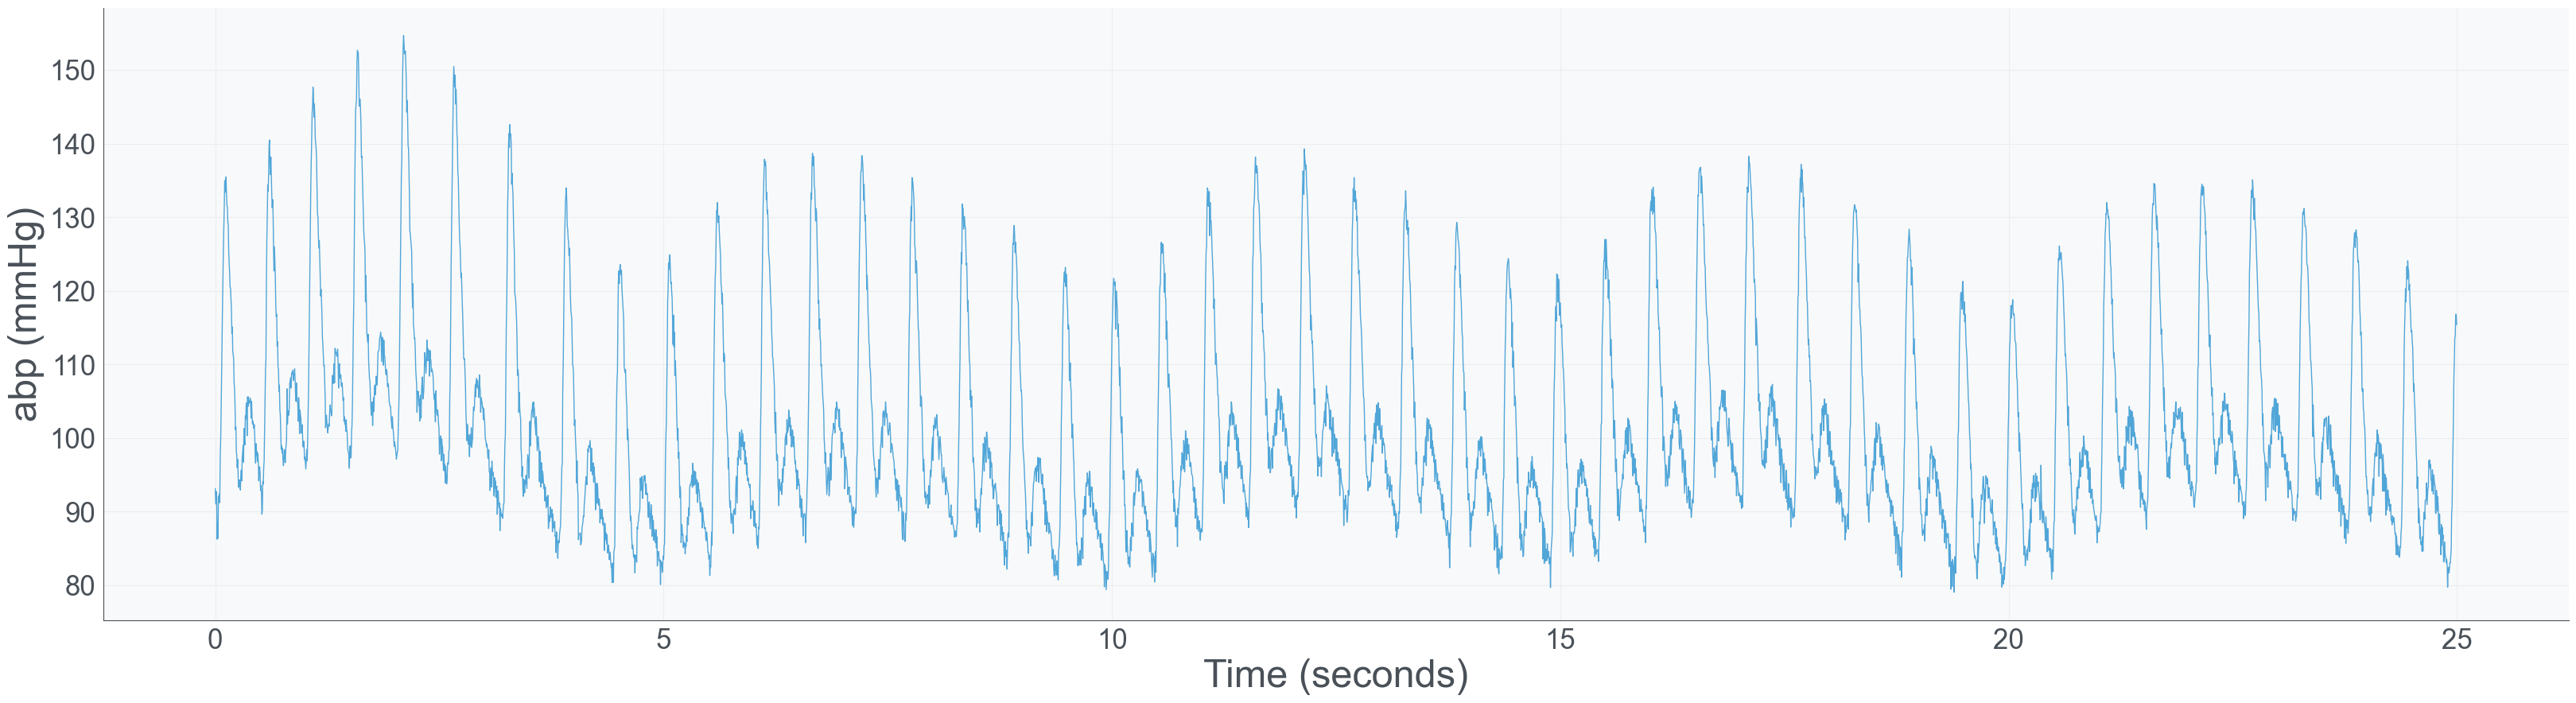

In [4]:
data_plot.plot_signal(df, 0, 5000, 200, False)

In [5]:
# applying biosppy filter
filtered_abp = biosppy.signals.abp.abp(df["Values"], sampling_rate=200, show=False)[1]
df["Values"] = filtered_abp

In [6]:
#data_plot.plot_signal(df, 0, 5000, 200, True)

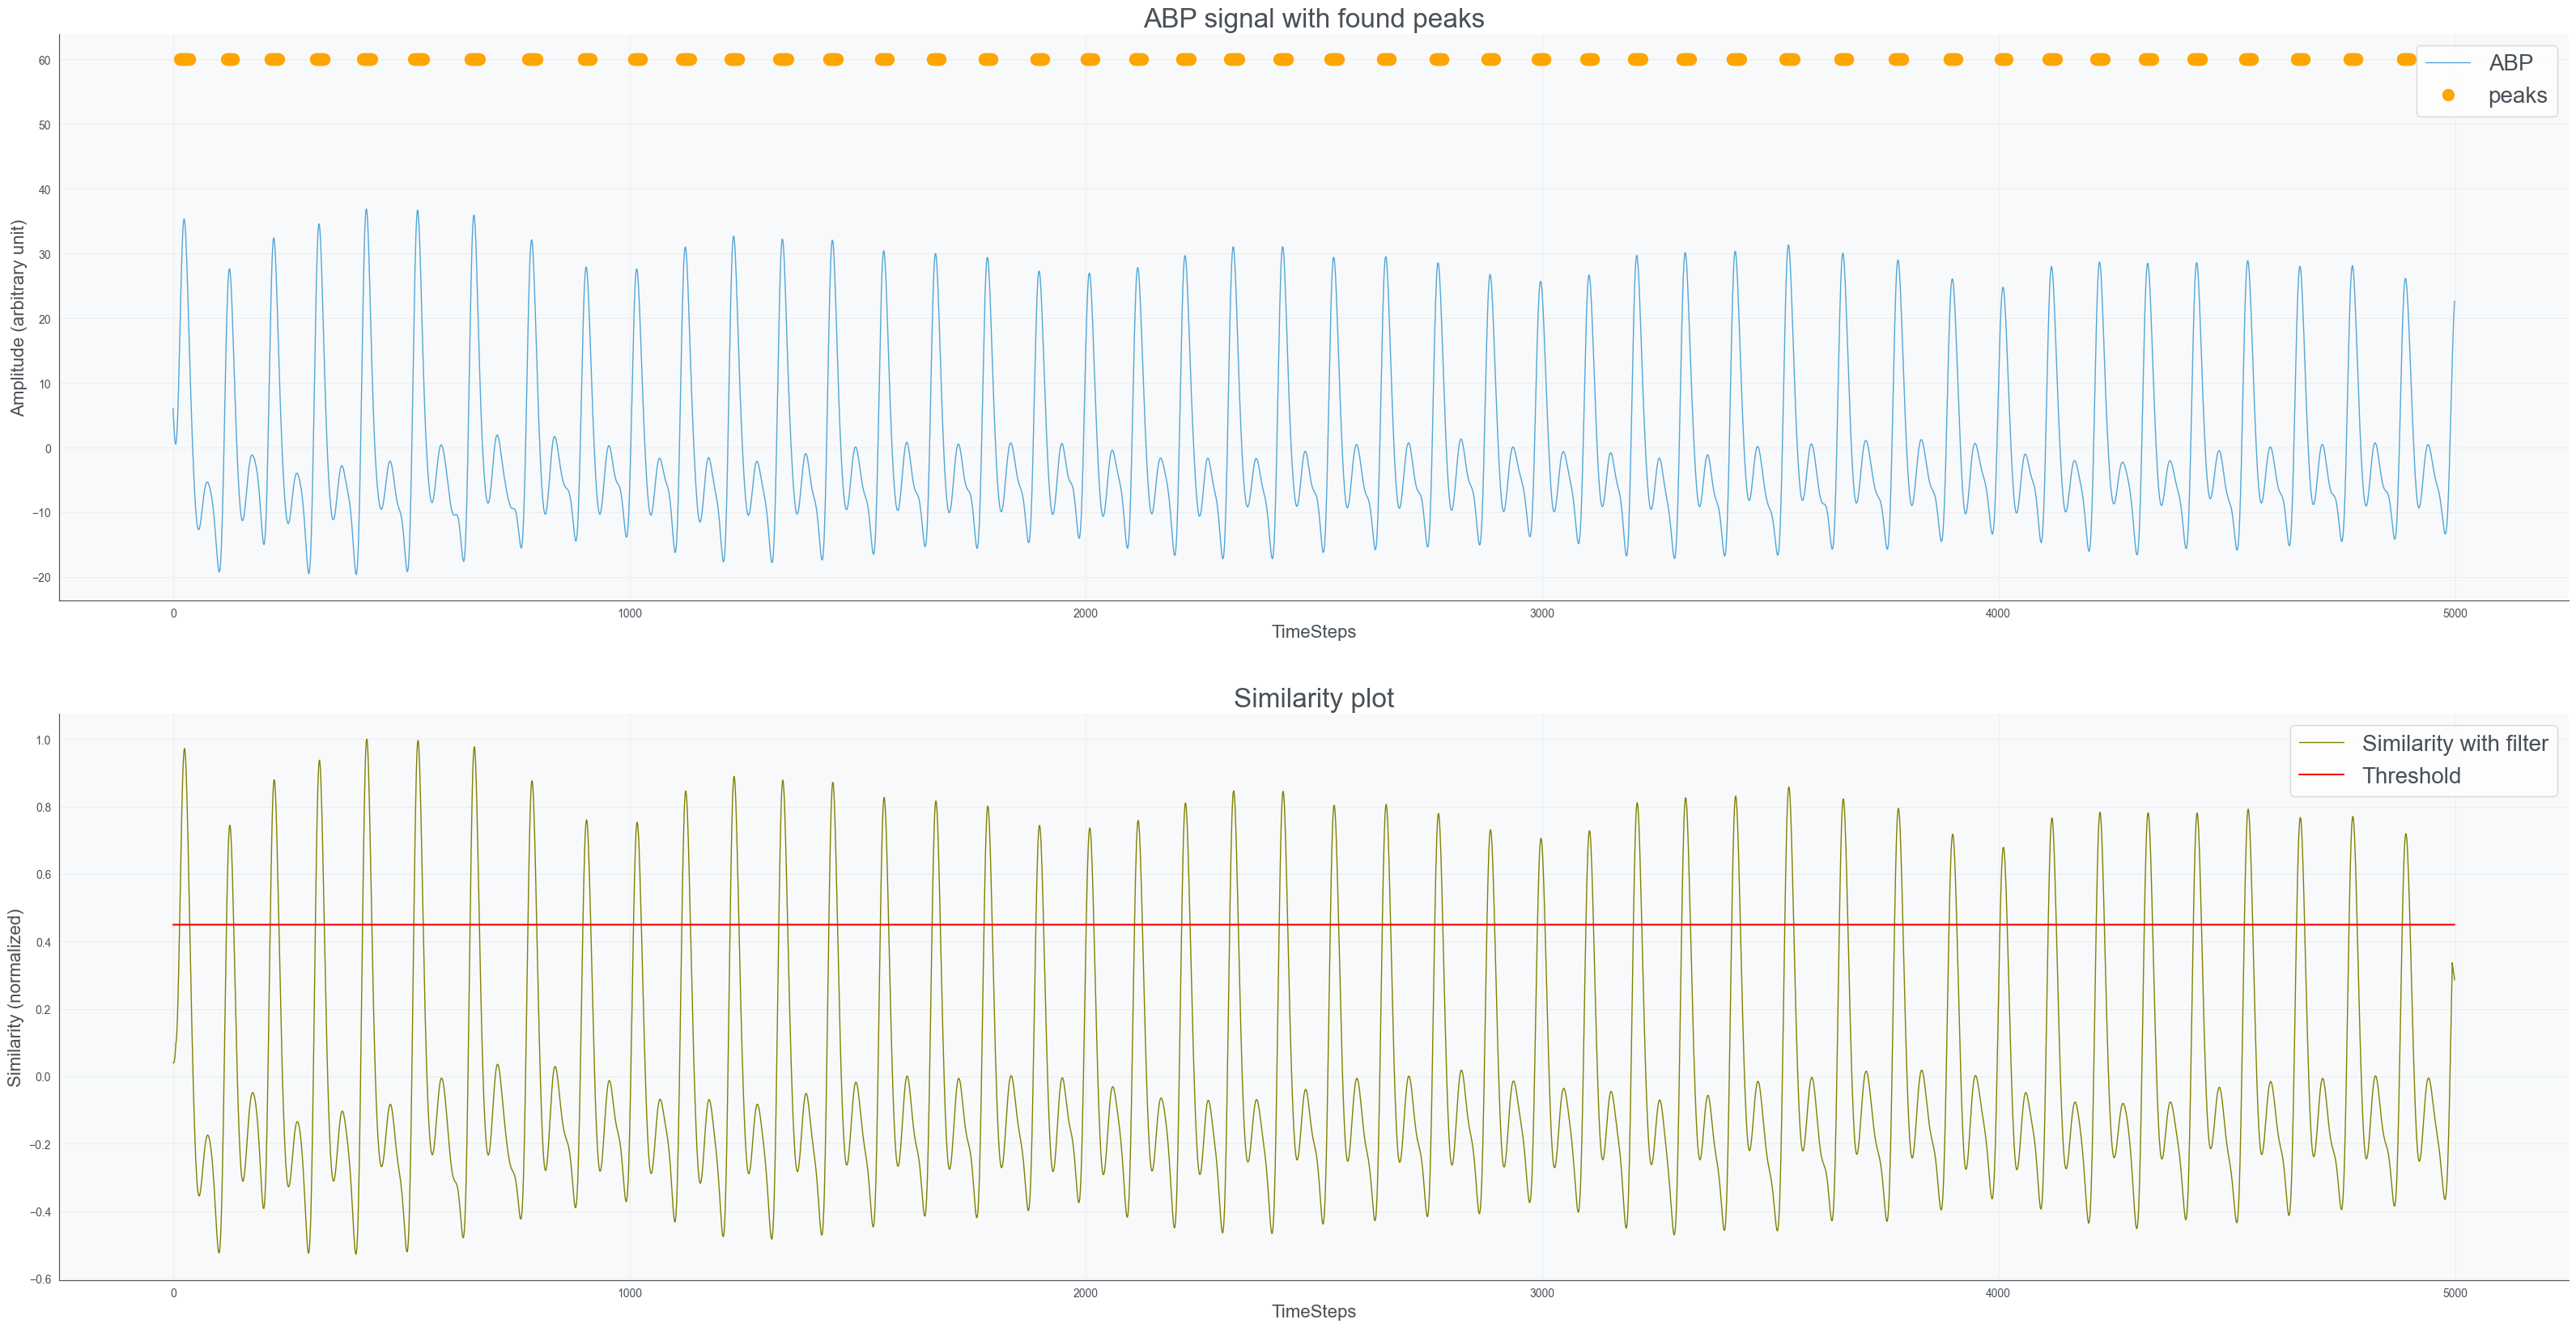

In [7]:
#peaks_detection.plot_abp_with_similarity(df, sampfrom=0, sampto=5000, nr_plots=1, threshold=0.45)

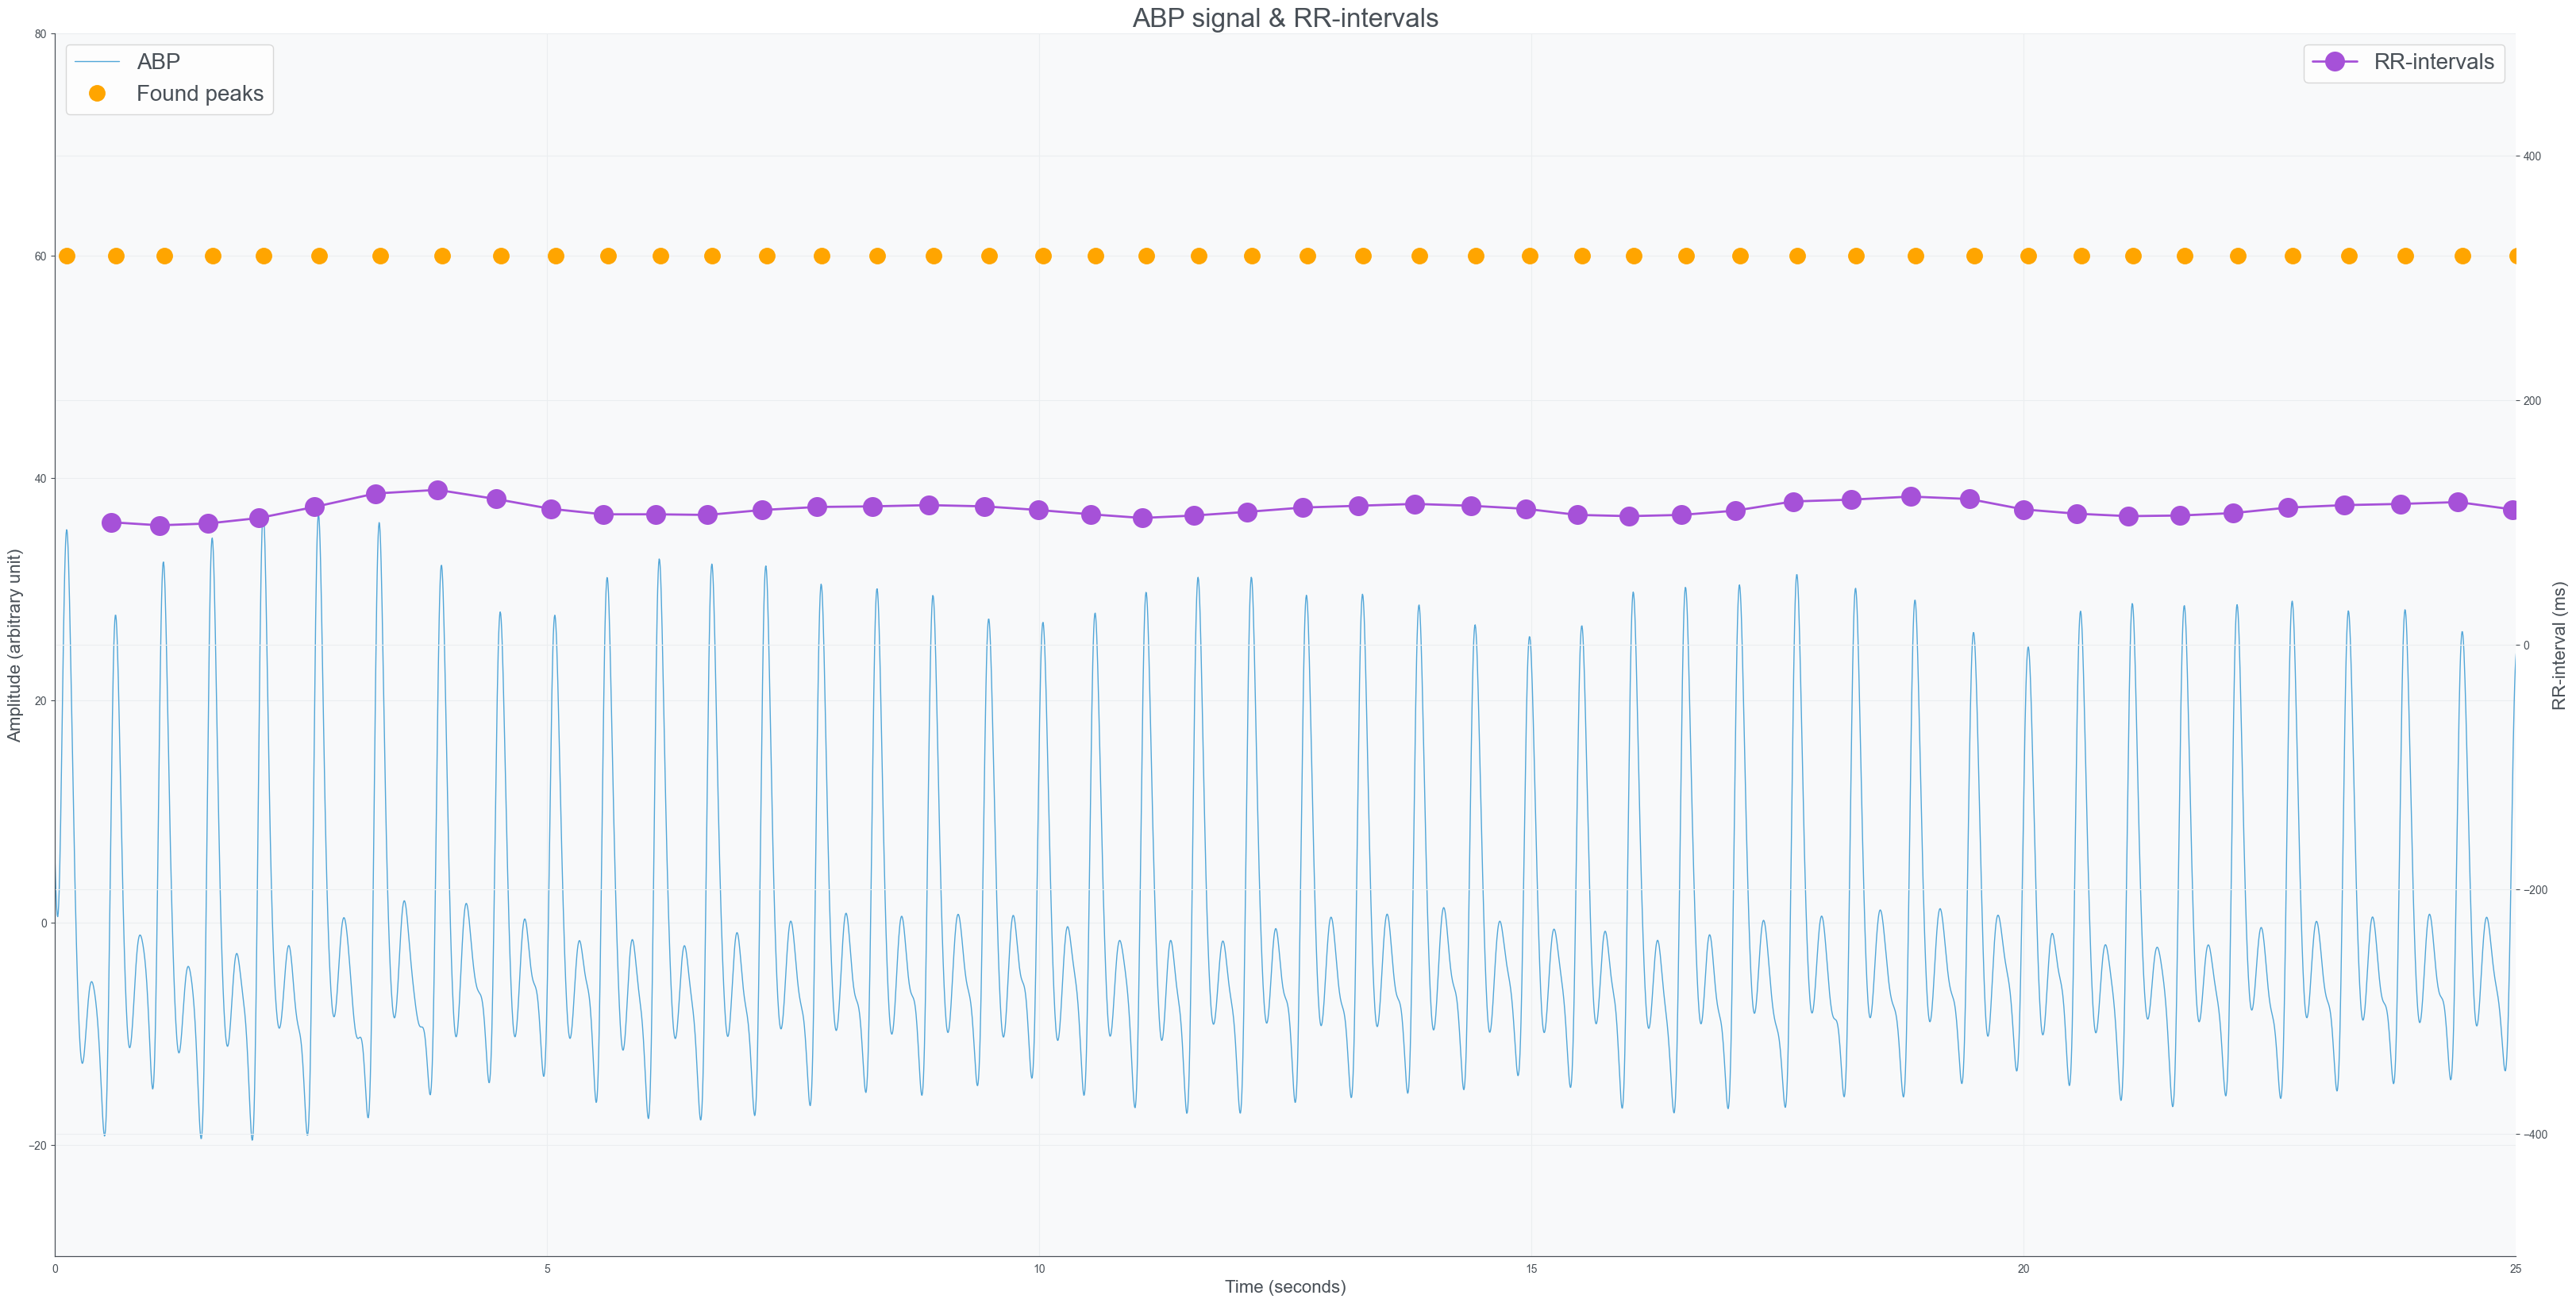

In [16]:
peaks_detection.plot_abp_vs_rr_intervals(df, sampfrom=0, sampto=5000, nr_plots=1)

In [9]:
rr = peaks_detection.rr_intervals(df["Values"], sampling_rate=200)

In [10]:
#peaks_detection.plot_rr_intervals(rr, True)

In [11]:
prsa_ac, ac_anchors, ac_anchors_neighbours = data_plot.calculate(rr, 3, "AC", 0.2)

In [12]:
prsa_dc, dc_anchors, dc_anchors_neighbours = data_plot.calculate(rr, 3, "DC", 0.2)

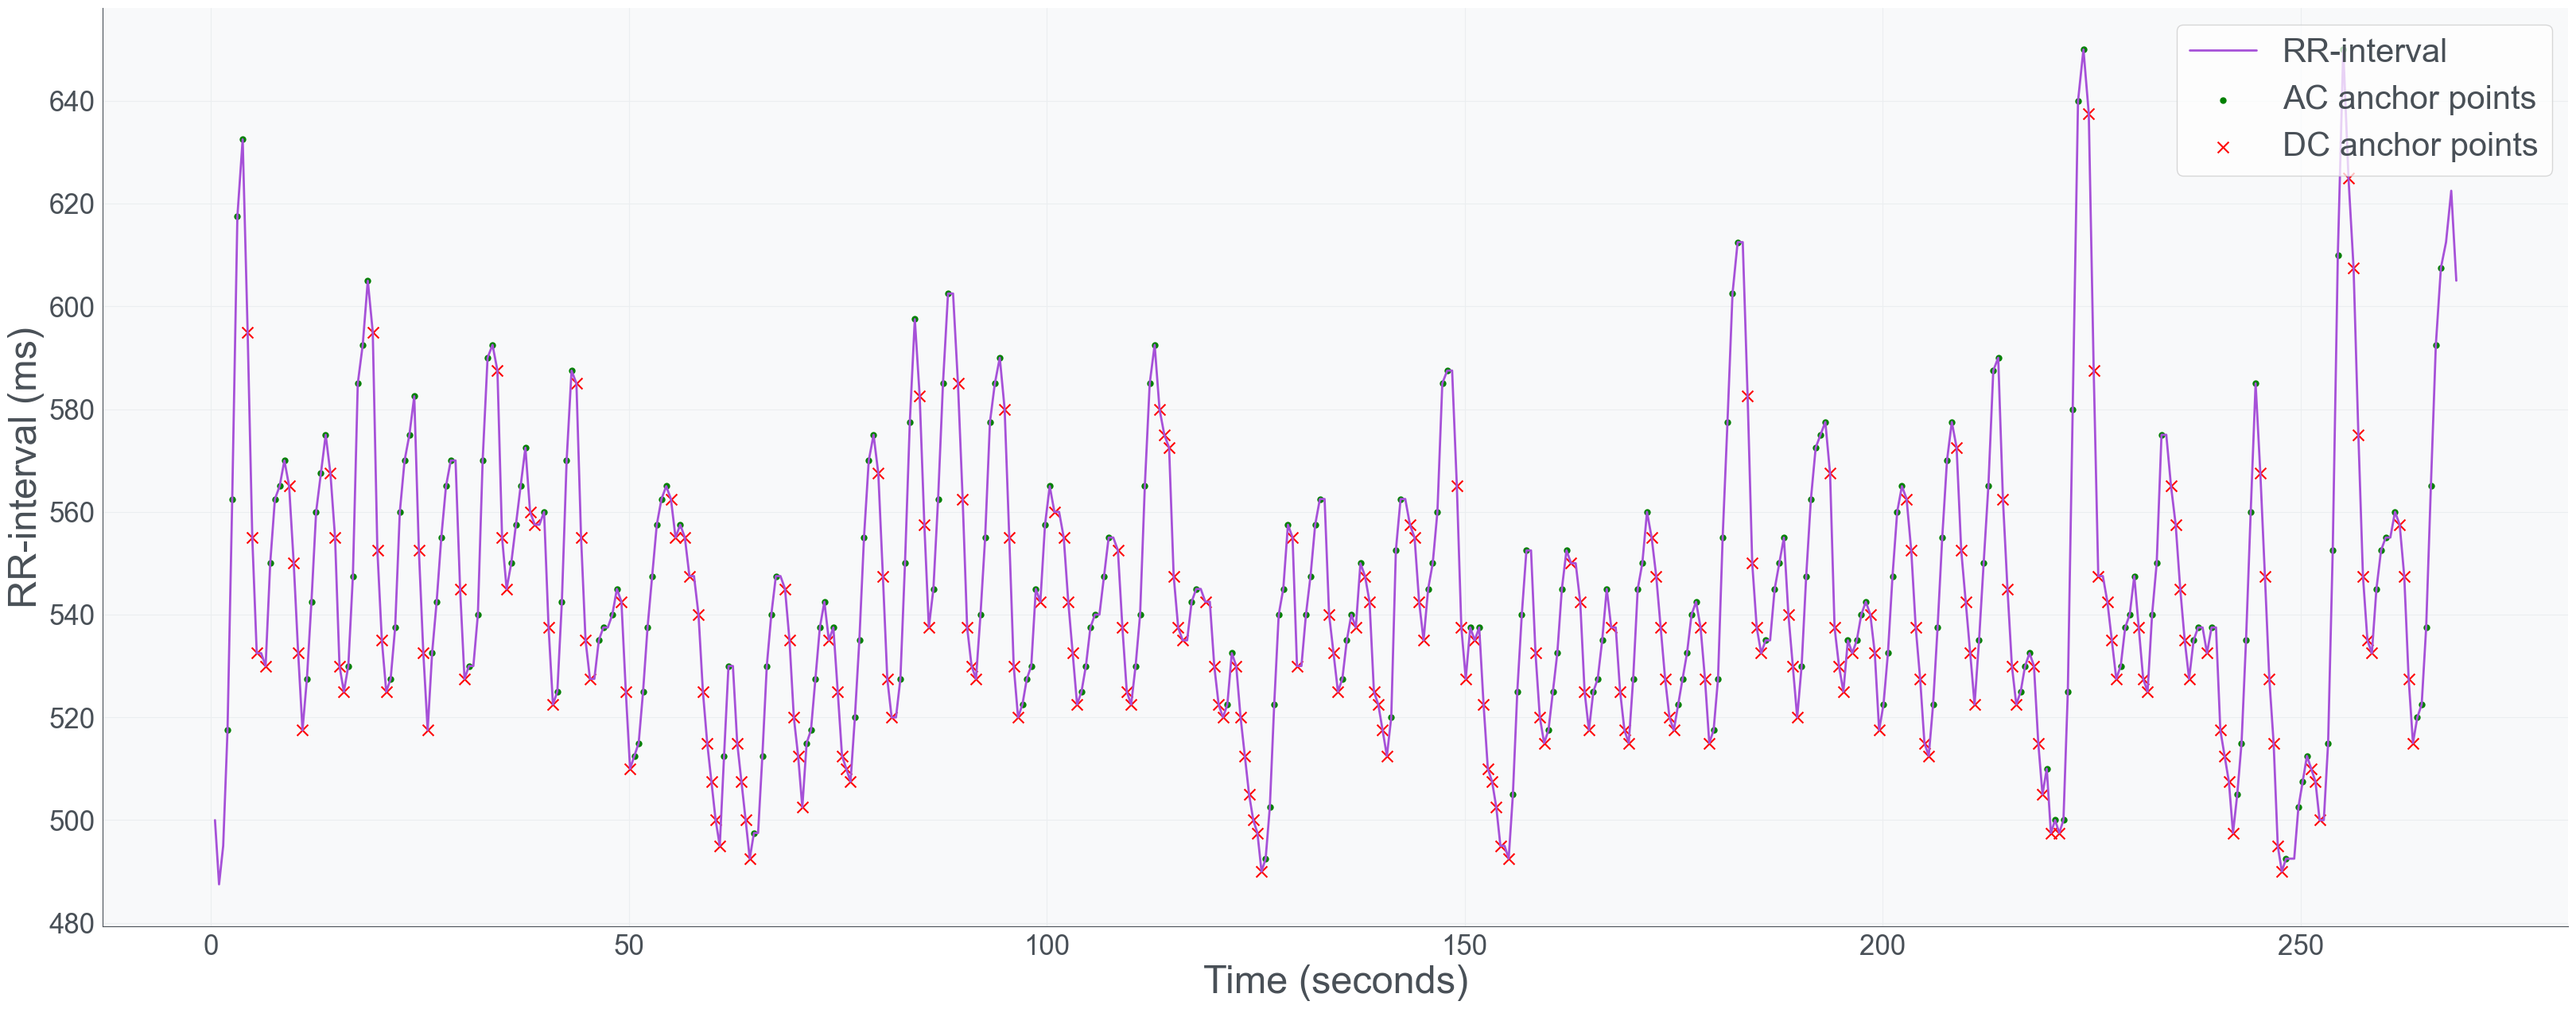

In [13]:
data_plot.plot_with_anchors(rr, ac_anchors, dc_anchors)

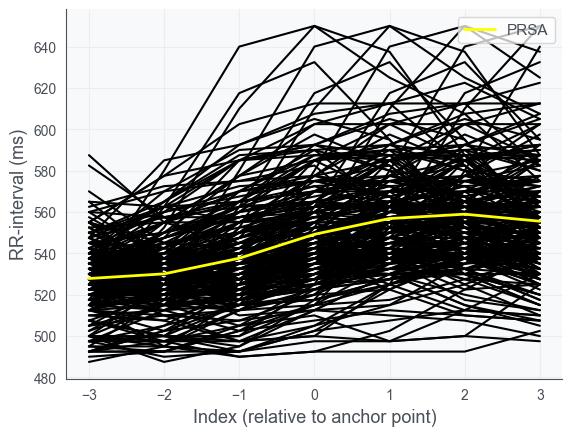

In [14]:
data_plot.plot_all_anchors_with_neighbours(ac_anchors_neighbours, prsa_ac, 'AC', 3)

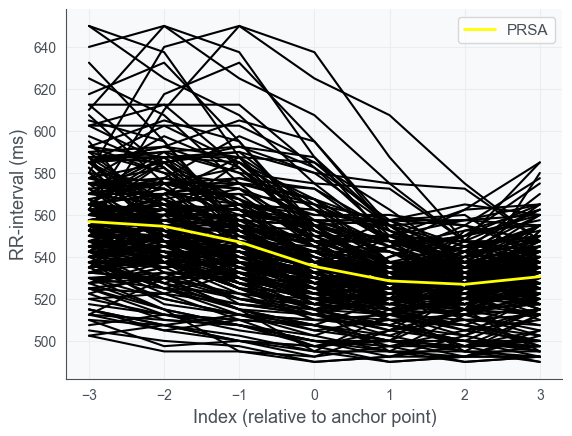

In [15]:
data_plot.plot_all_anchors_with_neighbours(dc_anchors_neighbours, prsa_dc, 'DC', 3)